In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import scipy

In [3]:
insu = pd.read_csv('customers.csv')

In [4]:
print(insu.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [5]:
print(insu.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
print(insu.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C93AD698C8>,
      dtype=object)

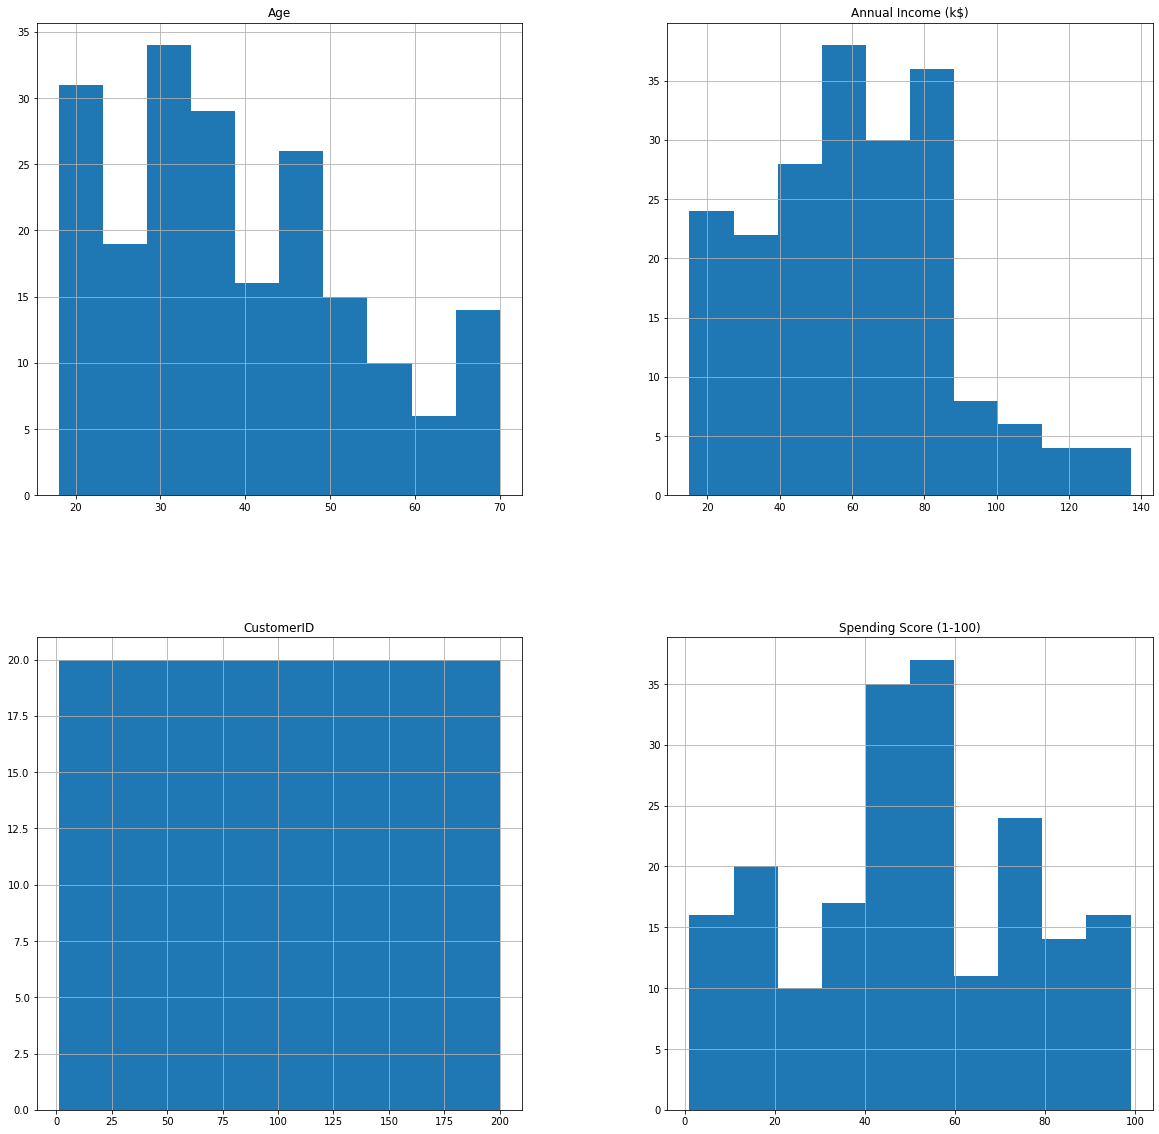

In [7]:
insu.hist(figsize=(20,20))

In [8]:
from sklearn import preprocessing

In [9]:
print(insu.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [10]:
print(insu.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [11]:
insu["Gender"] = insu["Gender"].map({"Male":0, "Female":1})

In [12]:
print(insu["Gender"].unique())

[0 1]


In [13]:
insu = insu.drop("CustomerID", axis=1)

In [14]:
print(insu.describe())

           Gender         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean     0.560000   38.850000           60.560000               50.200000
std      0.497633   13.969007           26.264721               25.823522
min      0.000000   18.000000           15.000000                1.000000
25%      0.000000   28.750000           41.500000               34.750000
50%      1.000000   36.000000           61.500000               50.000000
75%      1.000000   49.000000           78.000000               73.000000
max      1.000000   70.000000          137.000000               99.000000


In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

(200, 4)


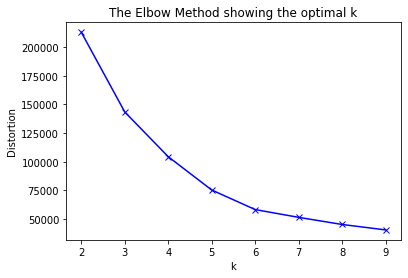

In [16]:
"""
We are creating a list that will hold the 
intertia_ = Sum of squared distances of samples to their closest cluster center.

We are then plotting interia_ for different k values.
"""

print(insu.shape)
# k means determine k
distortions = []
K = range(2, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(insu)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Conclusion
From the above plot, we can conclude that k=5 works better. 

#### Building a model with k=5

Now we have to build a K-means model with k=5

In [17]:
# Rerun the model with k=5

x = insu

km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0).fit(x)

In [18]:
print(x.shape)

(200, 4)


In [19]:
y_km = km.predict(x)

# Gender, Age, Annual Income, Spending Score

print("Gender, Age, Annual Income, Spending Score")
print(km.cluster_centers_)

Gender, Age, Annual Income, Spending Score
[[ 0.47222222 40.66666667 87.75       17.58333333]
 [ 0.53846154 32.69230769 86.53846154 82.12820513]
 [ 0.5875     42.9375     55.0875     49.7125    ]
 [ 0.60869565 45.2173913  26.30434783 20.91304348]
 [ 0.59090909 25.27272727 25.72727273 79.36363636]]


In [20]:
print(y_km.shape)
print(y_km)

(200,)
[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 2 3 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [21]:
print(type(y_km))

<class 'numpy.ndarray'>


In [22]:
ykm = y_km.reshape(-1,1)

In [23]:
print(ykm.shape)
print(ykm[0:10])

(200, 1)
[[3]
 [4]
 [3]
 [4]
 [3]
 [4]
 [3]
 [4]
 [3]
 [4]]


In [24]:
# Adding a new column with the group number

insu["Group"] = ykm

In [25]:
print(insu.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Group
0       0   19                  15                      39      3
1       0   21                  15                      81      4
2       1   20                  16                       6      3
3       1   23                  16                      77      4
4       1   31                  17                      40      3


#### Trying out a new point

In [26]:
# Gender = 0, Age = 19, Annual Income 16, spending score is 30

x = np.array([[0, 19, 16, 30]])

y_km = km.predict(x)
print(y_km)

[3]
